In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
print(df.head())

   CGPA     IQ Placement  Package
0  7.66  107.5        No     48.7
1  7.69   97.9        No     52.4
2  8.31  109.7       Yes     50.9
3  8.74  122.8       Yes     44.1
4  7.74   96.5       Yes     48.6


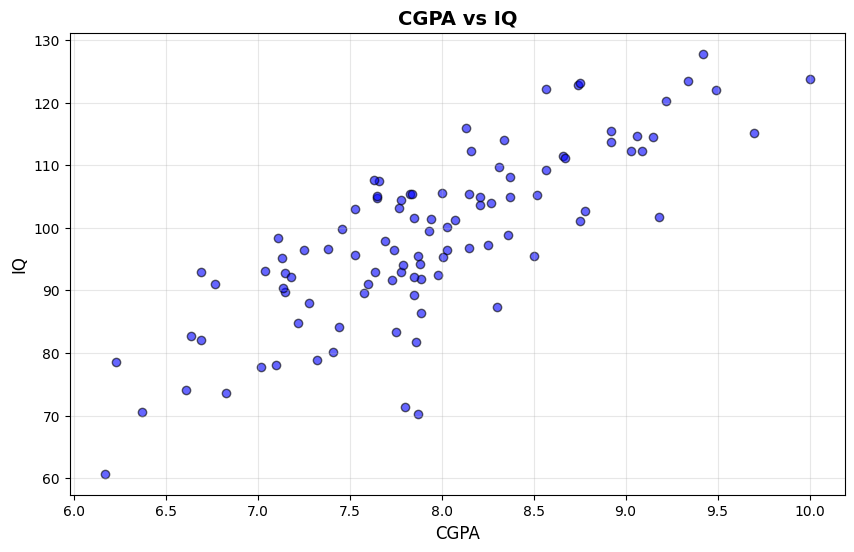

In [3]:
# Scatter plot: CGPA vs IQ
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['CGPA'], df['IQ'], alpha=0.6, c='blue', edgecolors='k')
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('IQ', fontsize=12)
plt.title('CGPA vs IQ', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

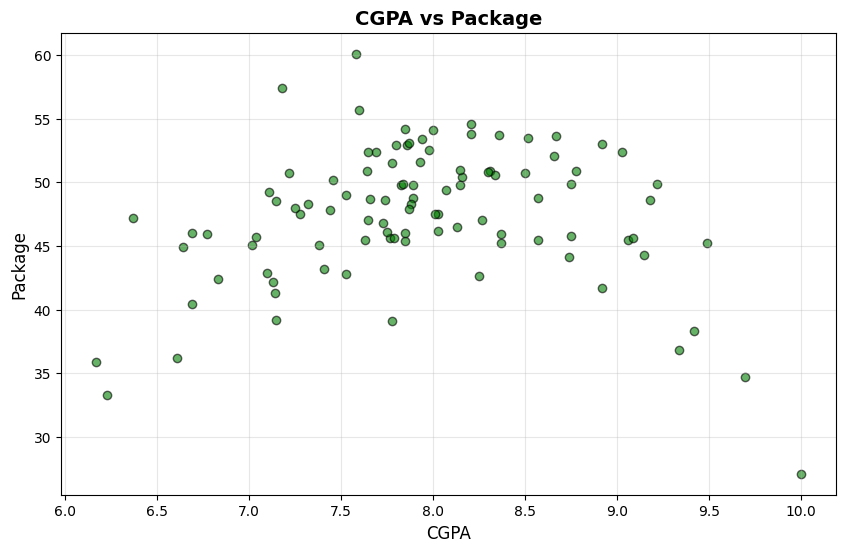

In [4]:
# Scatter plot: CGPA vs Package
plt.figure(figsize=(10, 6))
plt.scatter(df['CGPA'], df['Package'], alpha=0.6, c='green', edgecolors='k')
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Package', fontsize=12)
plt.title('CGPA vs Package', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

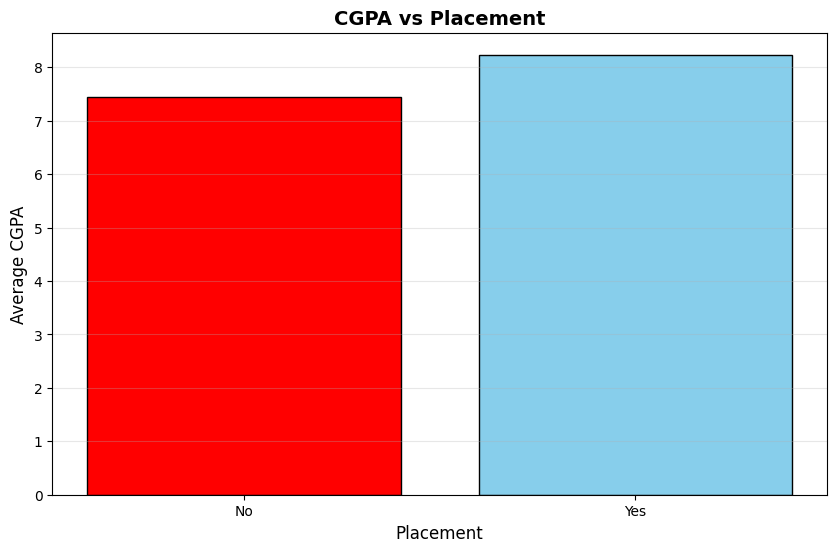

In [5]:
# Bar chart: CGPA vs Placement
placement_counts = df.groupby('Placement')['CGPA'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(placement_counts['Placement'], placement_counts['CGPA'], color=['red', 'skyblue'], edgecolor='k')
plt.xlabel('Placement', fontsize=12)
plt.ylabel('Average CGPA', fontsize=12)
plt.title('CGPA vs Placement', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [7]:
lr = LinearRegression()
ri = Ridge()
ls = Lasso()
el = ElasticNet()

x = df[['CGPA']]  # Use double brackets to get a DataFrame instead of Series
y = df[['IQ']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [8]:
x_train

,CGPA
55,8.34
88,7.18
26,6.64
42,7.11
69,7.14
...,...
60,7.15
71,8.75
14,6.61
92,7.58


In [9]:
lr.fit(x_train, y_train)
ls.fit(x_train, y_train)
ri.fit(x_train, y_train)
el.fit(x_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ut

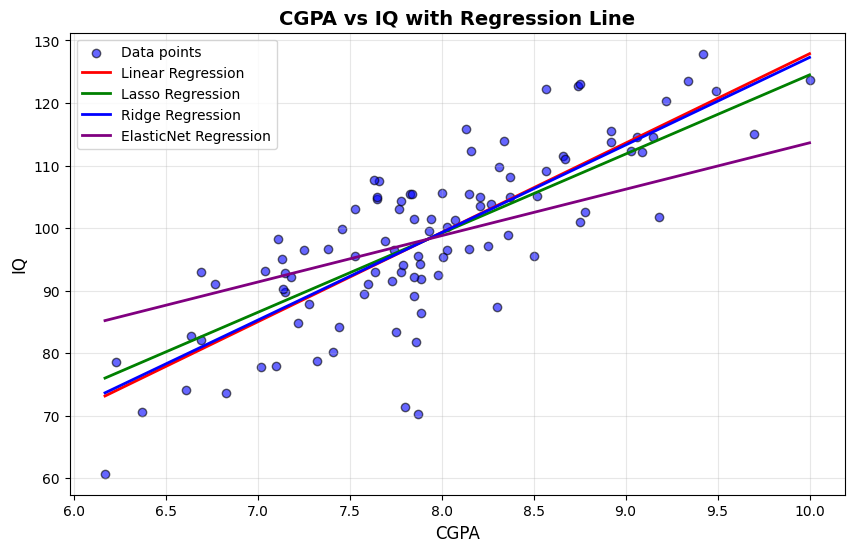

In [10]:
# Scatter plot with regression line: CGPA vs IQ
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(df['CGPA'], df['IQ'], alpha=0.6, c='blue', edgecolors='k', label='Data points')

# Create regression line
x_range = np.linspace(df['CGPA'].min(), df['CGPA'].max(), 100).reshape(-1, 1)

#predections
y1 = lr.predict(x_range)
y2 = ls.predict(x_range)
y3 = ri.predict(x_range)
y4 = el.predict(x_range)


plt.plot(x_range, y1, color='red', linewidth=2, label='Linear Regression')
plt.plot(x_range, y2, color='green', linewidth=2, label='Lasso Regression')
plt.plot(x_range, y3, color='blue', linewidth=2, label='Ridge Regression')
plt.plot(x_range, y4, color='purple', linewidth=2, label='ElasticNet Regression')

plt.xlabel('CGPA', fontsize=12)
plt.ylabel('IQ', fontsize=12)
plt.title('CGPA vs IQ with Regression Line', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
#accuracy
import sklearn.metrics as metrics

# Make predictions on test set
y_pred_lr = lr.predict(x_test)
y_pred_ls = ls.predict(x_test)
y_pred_ri = ri.predict(x_test)
y_pred_el = el.predict(x_test)

# Calculate metrics for all algorithms
algorithms = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet']
predictions = [y_pred_lr, y_pred_ls, y_pred_ri, y_pred_el]

print("=" * 80)
print("REGRESSION MODELS ACCURACY COMPARISON")
print("=" * 80)

for algo, y_pred in zip(algorithms, predictions):
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"\n{algo}:")
    print(f"  R² Score (Accuracy): {r2:.4f}")
    print(f"  Mean Absolute Error: {mae:.4f}")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  Root Mean Squared Error: {rmse:.4f}")

print("\n" + "=" * 80) 

REGRESSION MODELS ACCURACY COMPARISON

Linear Regression:
  R² Score (Accuracy): 0.5495
  Mean Absolute Error: 6.9967
  Mean Squared Error: 62.9292
  Root Mean Squared Error: 7.9328

Lasso:
  R² Score (Accuracy): 0.5599
  Mean Absolute Error: 7.0398
  Mean Squared Error: 61.4756
  Root Mean Squared Error: 7.8406

Ridge:
  R² Score (Accuracy): 0.5527
  Mean Absolute Error: 7.0043
  Mean Squared Error: 62.4822
  Root Mean Squared Error: 7.9046

ElasticNet:
  R² Score (Accuracy): 0.4643
  Mean Absolute Error: 7.2134
  Mean Squared Error: 74.8368
  Root Mean Squared Error: 8.6508

